# Food Delivery Data Analysis
### Combining Data and Analyzing Order Trends, User Behavior, and Business Performance

---
## Part 1: Creating the Final Dataset
First, we need to combine data from three different sources:
- orders.csv (order details)
- users.json (user information)
- restaurants.sql (restaurant details)

In [96]:
# Import required libraries
import pandas as pd
import json
import re

In [97]:
# Load the orders CSV file
orders_df = pd.read_csv('orders.csv')
print(f"Orders loaded: {orders_df.shape[0]} records, {orders_df.shape[1]} columns")
orders_df.head()

Orders loaded: 10000 records, 6 columns


,order_id,user_id,restaurant_id,order_date,total_amount,restaurant_name
0,1,2508,450,18-02-2023,842.97,New Foods Chinese
1,2,2693,309,18-01-2023,546.68,Ruchi Curry House Multicuisine
2,3,2084,107,15-07-2023,163.93,Spice Kitchen Punjabi
3,4,319,224,04-10-2023,1155.97,Darbar Kitchen Non-Veg
4,5,1064,293,25-12-2023,1321.91,Royal Eatery South Indian


In [98]:
# Load the users JSON file
with open('users.json', 'r') as f:
    users_data = json.load(f)

users_df = pd.DataFrame(users_data)
print(f"Users loaded: {users_df.shape[0]} records, {users_df.shape[1]} columns")
users_df.head()

Users loaded: 3000 records, 4 columns


,user_id,name,city,membership
0,1,User_1,Chennai,Regular
1,2,User_2,Pune,Gold
2,3,User_3,Bangalore,Gold
3,4,User_4,Bangalore,Regular
4,5,User_5,Pune,Gold


In [99]:
# Function to parse SQL file
def parse_sql_file(filename):
    restaurants = []
    with open(filename, 'r') as f:
        content = f.read()
    
    # Pattern to match INSERT statements
    pattern = r"INSERT INTO restaurants VALUES \((\d+),\s*'([^']+)',\s*'([^']+)',\s*([\d.]+)\)"
    matches = re.findall(pattern, content)
    
    for match in matches:
        restaurants.append({
            'restaurant_id': int(match[0]),
            'restaurant_name_sql': match[1],
            'cuisine': match[2],
            'rating': float(match[3])
        })
    return pd.DataFrame(restaurants)

In [100]:
# Load restaurants from SQL file
restaurants_df = parse_sql_file('restaurants.sql')
print(f"Restaurants loaded: {restaurants_df.shape[0]} records, {restaurants_df.shape[1]} columns")
restaurants_df.head()

Restaurants loaded: 500 records, 4 columns


,restaurant_id,restaurant_name_sql,cuisine,rating
0,1,Restaurant_1,Chinese,4.8
1,2,Restaurant_2,Indian,4.1
2,3,Restaurant_3,Mexican,4.3
3,4,Restaurant_4,Chinese,4.1
4,5,Restaurant_5,Chinese,4.8


In [101]:
# Merge orders with users
merged_df = orders_df.merge(users_df, on='user_id', how='left')
print(f"After merging with users: {merged_df.shape[0]} records")

After merging with users: 10000 records


In [102]:
# Merge with restaurants
final_df = merged_df.merge(restaurants_df, on='restaurant_id', how='left')
print(f"After merging with restaurants: {final_df.shape[0]} records")

After merging with restaurants: 10000 records


In [103]:
# Rename columns for clarity
final_df = final_df.rename(columns={
    'name': 'user_name',
    'city': 'user_city'
})

print("Columns in final dataset:")
print(final_df.columns.tolist())

Columns in final dataset:
['order_id', 'user_id', 'restaurant_id', 'order_date', 'total_amount', 'restaurant_name', 'user_name', 'user_city', 'membership', 'restaurant_name_sql', 'cuisine', 'rating']


In [104]:
# Save the final dataset
final_df.to_csv('final_food_delivery_dataset.csv', index=False)
print("Final dataset saved successfully!")
print(f"Total Records: {len(final_df)}")
print(f"Total Columns: {len(final_df.columns)}")

Final dataset saved successfully!
Total Records: 10000
Total Columns: 12


In [105]:
# View the first few rows of final dataset
final_df.head(10)

,order_id,user_id,restaurant_id,order_date,total_amount,restaurant_name,user_name,user_city,membership,restaurant_name_sql,cuisine,rating
0,1,2508,450,18-02-2023,842.97,New Foods Chinese,User_2508,Hyderabad,Regular,Restaurant_450,Mexican,3.2
1,2,2693,309,18-01-2023,546.68,Ruchi Curry House Multicuisine,User_2693,Pune,Regular,Restaurant_309,Indian,4.5
2,3,2084,107,15-07-2023,163.93,Spice Kitchen Punjabi,User_2084,Chennai,Gold,Restaurant_107,Mexican,4.0
3,4,319,224,04-10-2023,1155.97,Darbar Kitchen Non-Veg,User_319,Bangalore,Gold,Restaurant_224,Chinese,4.8
4,5,1064,293,25-12-2023,1321.91,Royal Eatery South Indian,User_1064,Pune,Regular,Restaurant_293,Italian,3.0
5,6,2933,499,12-07-2023,1497.22,Annapurna Tiffins South Indian,User_2933,Chennai,Regular,Restaurant_499,Mexican,4.9
6,7,970,35,30-05-2023,129.21,Royal Biryani North Indian,User_970,Bangalore,Regular,Restaurant_35,Chinese,3.9
7,8,891,57,07-11-2023,269.19,Spice Mess Punjabi,User_891,Pune,Regular,Restaurant_57,Mexican,4.4
8,9,364,7,05-12-2023,953.30,Ruchi Biryani Punjabi,User_364,Chennai,Gold,Restaurant_7,Italian,3.2
9,10,2972,183,30-12-2023,351.41,Taste of Biryani Non-Veg,User_2972,Bangalore,Regular,Restaurant_183,Chinese,3.7


---
## Part 2: Data Analysis
Now let's analyze the combined dataset

In [11]:
# Import libraries for analysis
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [12]:
# Set plot style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')

In [13]:
# Load the dataset
df = pd.read_csv('final_food_delivery_dataset.csv')
print(f"Dataset Shape: {df.shape}")

Dataset Shape: (10000, 12)


In [14]:
# Check data types
df.dtypes

order_id                 int64
user_id                  int64
restaurant_id            int64
order_date              object
total_amount           float64
restaurant_name         object
user_name               object
user_city               object
membership              object
restaurant_name_sql     object
cuisine                 object
rating                 float64
dtype: object

In [15]:
# Check for missing values
df.isnull().sum()

order_id               0
user_id                0
restaurant_id          0
order_date             0
total_amount           0
restaurant_name        0
user_name              0
user_city              0
membership             0
restaurant_name_sql    0
cuisine                0
rating                 0
dtype: int64

In [16]:
# Convert order_date to datetime
df['order_date'] = pd.to_datetime(df['order_date'], format='%d-%m-%Y')
print("Date column converted successfully!")

Date column converted successfully!


In [17]:
# Extract year from date
df['year'] = df['order_date'].dt.year

In [18]:
# Extract month from date
df['month'] = df['order_date'].dt.month
df['month_name'] = df['order_date'].dt.month_name()

In [19]:
# Extract day of week
df['day_of_week'] = df['order_date'].dt.day_name()

In [20]:
# Extract quarter
df['quarter'] = df['order_date'].dt.quarter

In [21]:
# Check the new columns
df[['order_date', 'year', 'month', 'month_name', 'day_of_week', 'quarter']].head()

,order_date,year,month,month_name,day_of_week,quarter
0,2023-02-18,2023,2,February,Saturday,1
1,2023-01-18,2023,1,January,Wednesday,1
2,2023-07-15,2023,7,July,Saturday,3
3,2023-10-04,2023,10,October,Wednesday,4
4,2023-12-25,2023,12,December,Monday,4


---
## Section 1: Order Trends Over Time

In [22]:
# Calculate monthly orders
monthly_orders = df.groupby(['year', 'month']).size().reset_index(name='order_count')
monthly_orders['period'] = monthly_orders['year'].astype(str) + '-' + monthly_orders['month'].astype(str).str.zfill(2)
monthly_orders

,year,month,order_count,period
0,2023,1,804,2023-01
1,2023,2,785,2023-02
2,2023,3,903,2023-03
3,2023,4,812,2023-04
4,2023,5,844,2023-05
5,2023,6,784,2023-06
6,2023,7,859,2023-07
7,2023,8,851,2023-08
8,2023,9,812,2023-09
9,2023,10,863,2023-10


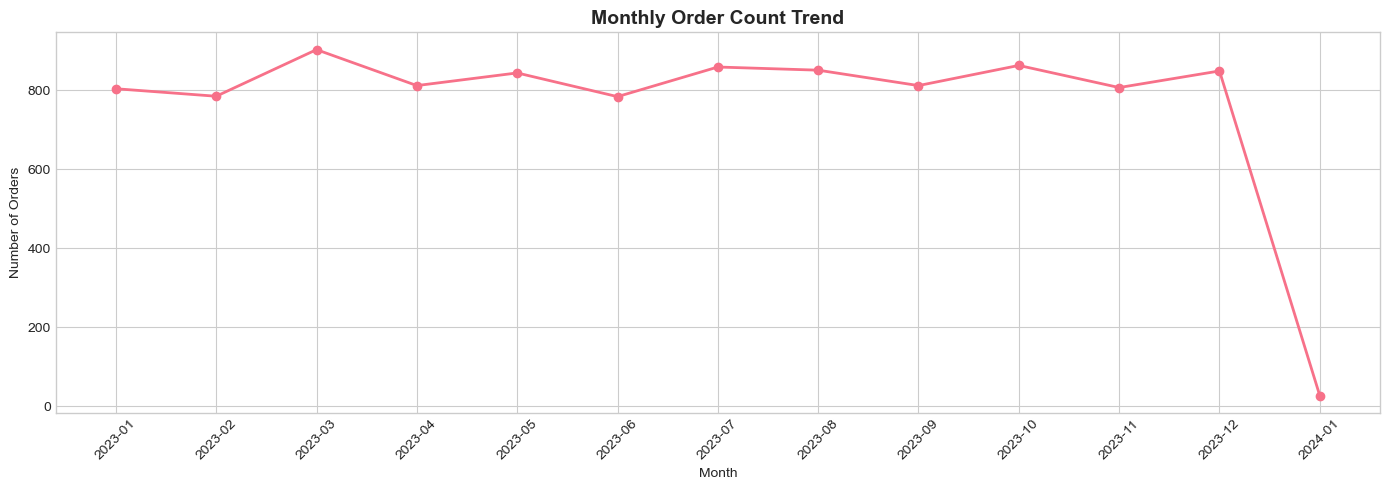

In [23]:
# Plot monthly order count
plt.figure(figsize=(14, 5))
plt.plot(monthly_orders['period'], monthly_orders['order_count'], marker='o', linewidth=2)
plt.title('Monthly Order Count Trend', fontsize=14, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [24]:
# Calculate monthly revenue
monthly_revenue = df.groupby(['year', 'month'])['total_amount'].sum().reset_index()
monthly_revenue['period'] = monthly_revenue['year'].astype(str) + '-' + monthly_revenue['month'].astype(str).str.zfill(2)
monthly_revenue

,year,month,total_amount,period
0,2023,1,645818.76,2023-01
1,2023,2,630867.40,2023-02
2,2023,3,716738.98,2023-03
3,2023,4,666097.18,2023-04
4,2023,5,668428.61,2023-05
5,2023,6,610822.93,2023-06
6,2023,7,688559.45,2023-07
7,2023,8,694987.58,2023-08
8,2023,9,653838.07,2023-09
9,2023,10,699187.73,2023-10


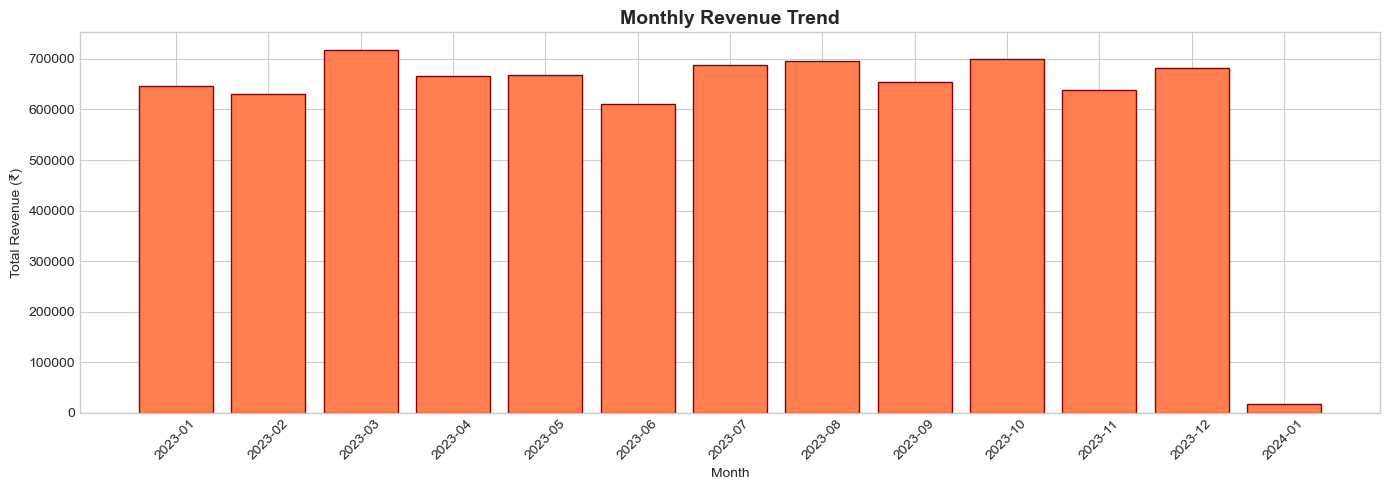

In [25]:
# Plot monthly revenue
plt.figure(figsize=(14, 5))
plt.bar(monthly_revenue['period'], monthly_revenue['total_amount'], color='coral', edgecolor='darkred')
plt.title('Monthly Revenue Trend', fontsize=14, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Total Revenue (₹)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [26]:
# Define day order for proper sorting
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [27]:
# Count orders by day of week
day_wise = df['day_of_week'].value_counts().reindex(day_order)
day_wise

day_of_week
Monday       1418
Tuesday      1368
Wednesday    1404
Thursday     1453
Friday       1466
Saturday     1430
Sunday       1461
Name: count, dtype: int64

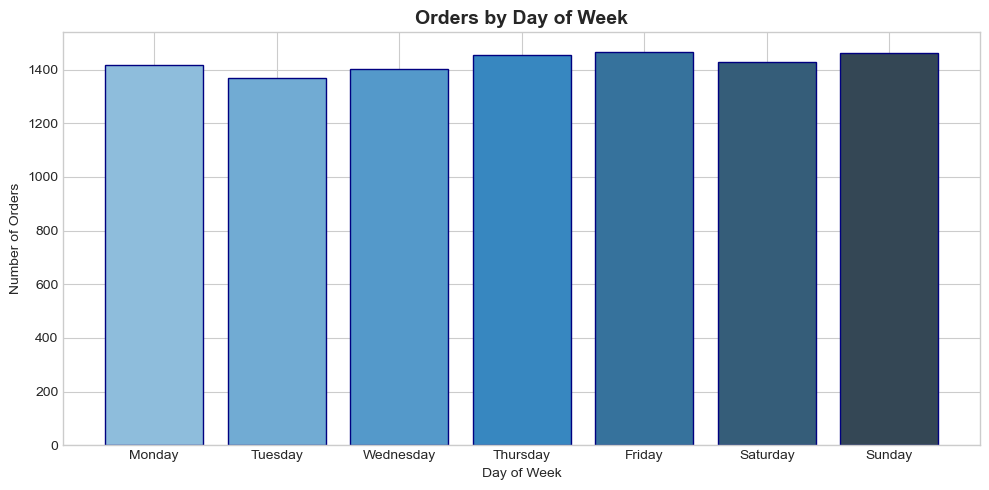

In [28]:
# Plot orders by day of week
plt.figure(figsize=(10, 5))
colors = sns.color_palette('Blues_d', len(day_order))
plt.bar(day_wise.index, day_wise.values, color=colors, edgecolor='navy')
plt.title('Orders by Day of Week', fontsize=14, fontweight='bold')
plt.xlabel('Day of Week')
plt.ylabel('Number of Orders')
plt.tight_layout()
plt.show()

In [29]:
# Calculate quarterly statistics
quarterly = df.groupby('quarter').agg({'order_id': 'count', 'total_amount': 'sum'}).reset_index()
quarterly.columns = ['Quarter', 'Orders', 'Revenue']
quarterly

,Quarter,Orders,Revenue
0,1,2519,2010626.64
1,2,2440,1945348.72
2,3,2522,2037385.10
3,4,2519,2018263.66


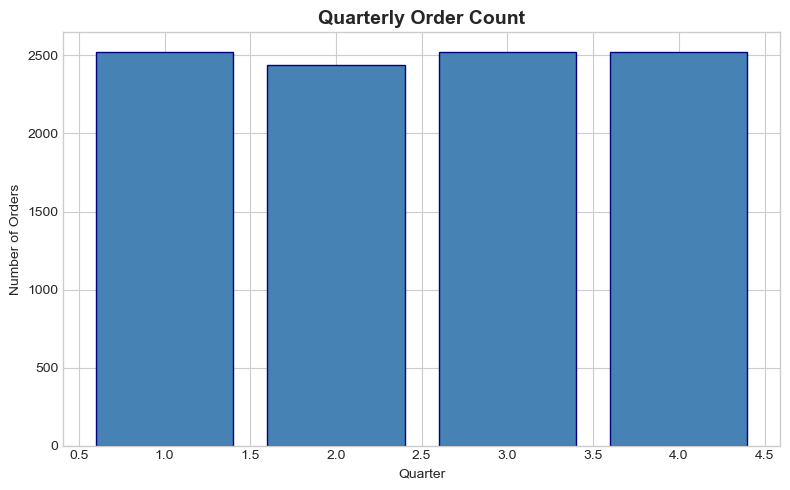

In [30]:
# Plot quarterly orders
plt.figure(figsize=(8, 5))
plt.bar(quarterly['Quarter'], quarterly['Orders'], color='steelblue', edgecolor='navy')
plt.title('Quarterly Order Count', fontsize=14, fontweight='bold')
plt.xlabel('Quarter')
plt.ylabel('Number of Orders')
plt.tight_layout()
plt.show()

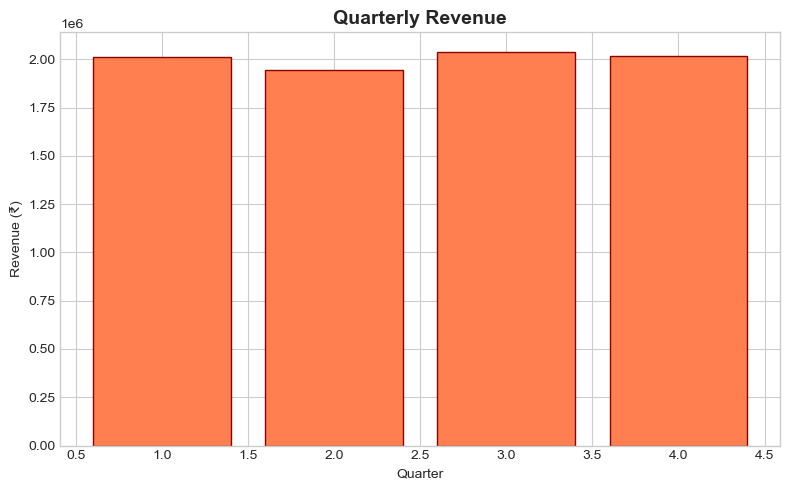

In [31]:
# Plot quarterly revenue
plt.figure(figsize=(8, 5))
plt.bar(quarterly['Quarter'], quarterly['Revenue'], color='coral', edgecolor='darkred')
plt.title('Quarterly Revenue', fontsize=14, fontweight='bold')
plt.xlabel('Quarter')
plt.ylabel('Revenue (₹)')
plt.tight_layout()
plt.show()

---
## Section 2: User Behavior Patterns

In [32]:
# Calculate orders per user
user_orders = df.groupby('user_id').size().reset_index(name='order_count')
print(f"Total unique users: {len(user_orders)}")
user_orders.head()

Total unique users: 2883


,user_id,order_count
0,1,1
1,2,10
2,3,2
3,4,4
4,5,5


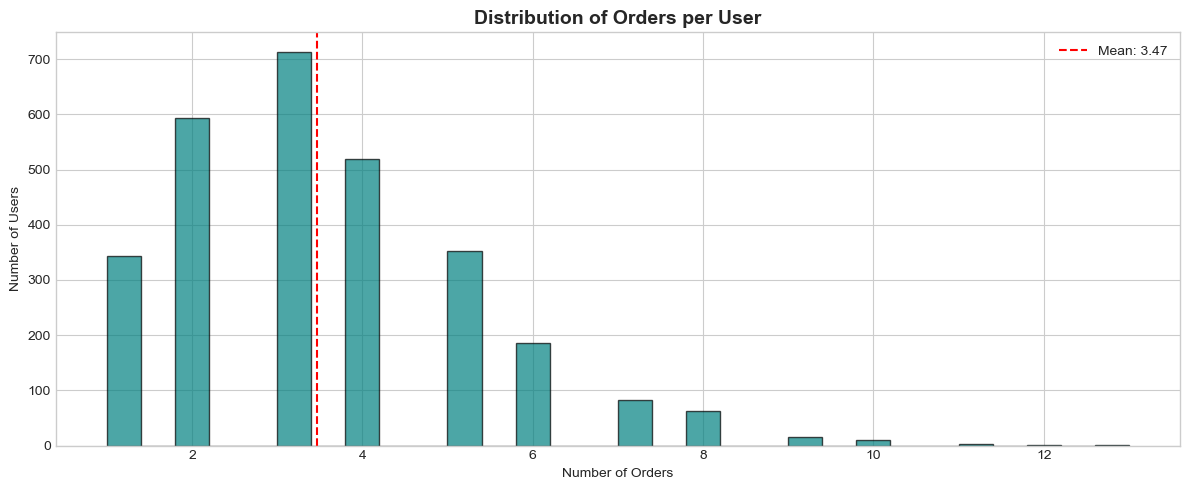

In [33]:
# Plot order frequency distribution
plt.figure(figsize=(12, 5))
plt.hist(user_orders['order_count'], bins=30, color='teal', edgecolor='black', alpha=0.7)
plt.title('Distribution of Orders per User', fontsize=14, fontweight='bold')
plt.xlabel('Number of Orders')
plt.ylabel('Number of Users')
plt.axvline(user_orders['order_count'].mean(), color='red', linestyle='--', label=f"Mean: {user_orders['order_count'].mean():.2f}")
plt.legend()
plt.tight_layout()
plt.show()

In [34]:
# Print order statistics
print(f"Average orders per user: {user_orders['order_count'].mean():.2f}")
print(f"Max orders by a single user: {user_orders['order_count'].max()}")

Average orders per user: 3.47
Max orders by a single user: 13


In [35]:
# Calculate spending per user
user_spending = df.groupby('user_id')['total_amount'].sum().reset_index(name='total_spent')
user_spending.head()

,user_id,total_spent
0,1,1289.66
1,2,7564.12
2,3,1839.51
3,4,3741.16
4,5,5742.88


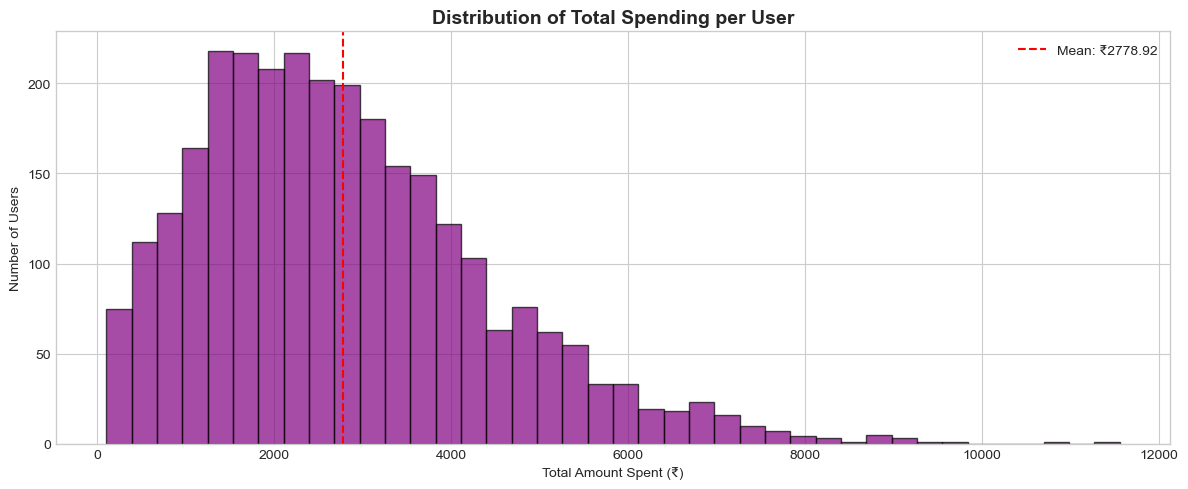

In [36]:
# Plot spending distribution
plt.figure(figsize=(12, 5))
plt.hist(user_spending['total_spent'], bins=40, color='purple', edgecolor='black', alpha=0.7)
plt.title('Distribution of Total Spending per User', fontsize=14, fontweight='bold')
plt.xlabel('Total Amount Spent (₹)')
plt.ylabel('Number of Users')
plt.axvline(user_spending['total_spent'].mean(), color='red', linestyle='--', label=f"Mean: ₹{user_spending['total_spent'].mean():.2f}")
plt.legend()
plt.tight_layout()
plt.show()

In [37]:
# Find top 10 users by order count
top_users = user_orders.nlargest(10, 'order_count')
top_users

,user_id,order_count
2856,2973,13
1451,1515,12
482,496,11
842,874,11
1278,1337,11
1,2,10
345,358,10
627,650,10
760,789,10
1152,1201,10


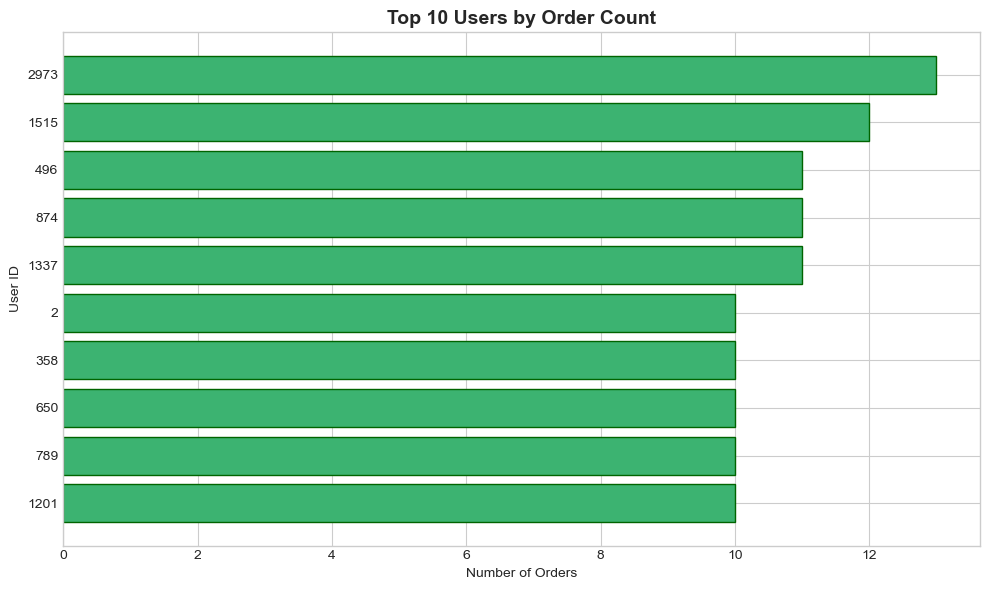

In [38]:
# Plot top users
plt.figure(figsize=(10, 6))
plt.barh(top_users['user_id'].astype(str), top_users['order_count'], color='mediumseagreen', edgecolor='darkgreen')
plt.title('Top 10 Users by Order Count', fontsize=14, fontweight='bold')
plt.xlabel('Number of Orders')
plt.ylabel('User ID')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [39]:
# Create user segments based on order frequency
def classify_user(count):
    if count == 1:
        return 'One-time'
    elif count <= 3:
        return 'Occasional'
    elif count <= 6:
        return 'Regular'
    else:
        return 'Frequent'

In [40]:
# Apply segmentation
user_orders['segment'] = user_orders['order_count'].apply(classify_user)
segment_counts = user_orders['segment'].value_counts()
segment_counts

segment
Occasional    1306
Regular       1057
One-time       344
Frequent       176
Name: count, dtype: int64

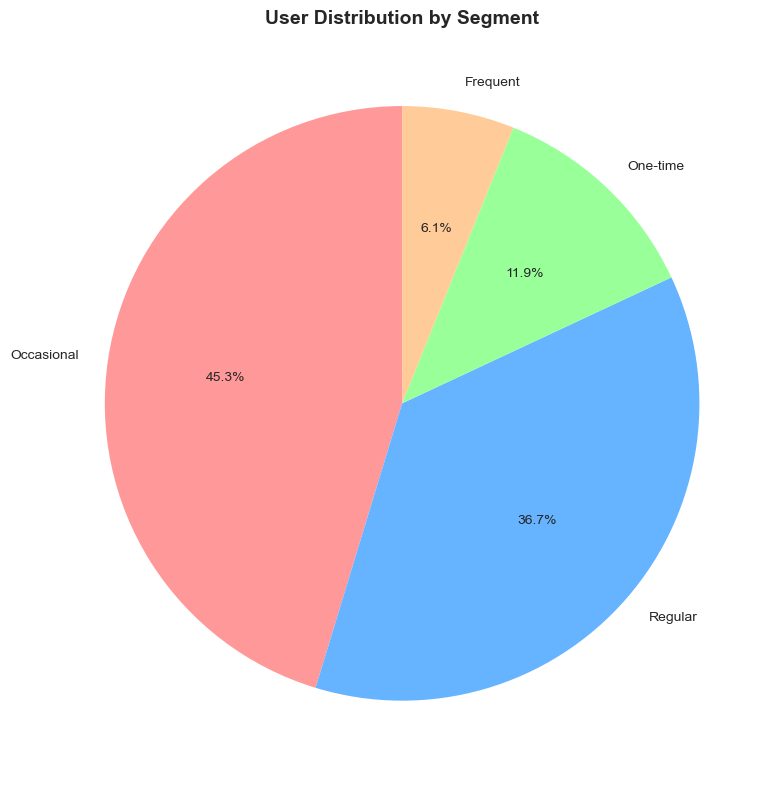

In [41]:
# Plot user segments pie chart
plt.figure(figsize=(8, 8))
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
plt.pie(segment_counts.values, labels=segment_counts.index, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('User Distribution by Segment', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

---
## Section 3: City-wise Performance

In [42]:
# Count orders by city
city_orders = df['user_city'].value_counts()
city_orders

user_city
Bangalore    2751
Chennai      2469
Pune         2430
Hyderabad    2350
Name: count, dtype: int64

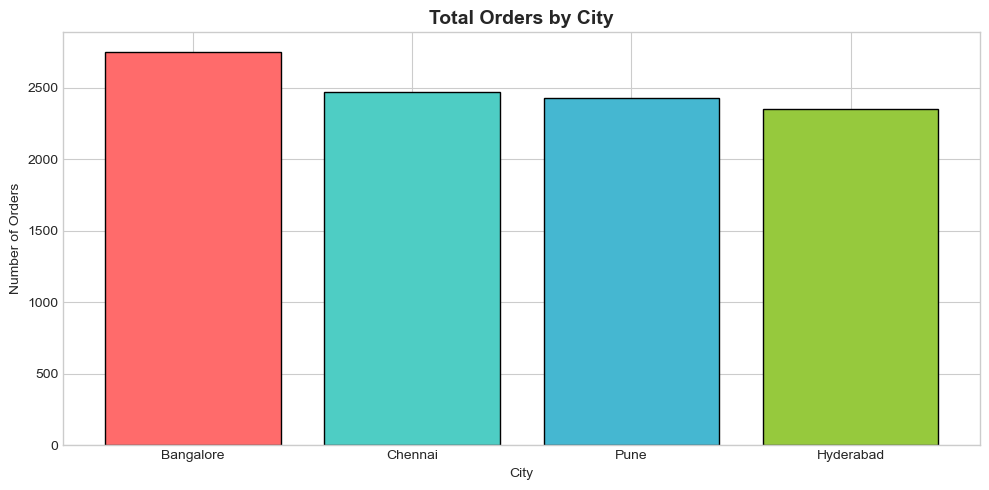

In [43]:
# Plot orders by city
plt.figure(figsize=(10, 5))
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96C93D', '#F7DC6F']
plt.bar(city_orders.index, city_orders.values, color=colors, edgecolor='black')
plt.title('Total Orders by City', fontsize=14, fontweight='bold')
plt.xlabel('City')
plt.ylabel('Number of Orders')
plt.tight_layout()
plt.show()

In [44]:
# Calculate revenue by city
city_revenue = df.groupby('user_city')['total_amount'].sum().sort_values(ascending=False)
city_revenue

user_city
Bangalore    2206946.58
Chennai      1990513.03
Pune         1924797.93
Hyderabad    1889366.58
Name: total_amount, dtype: float64

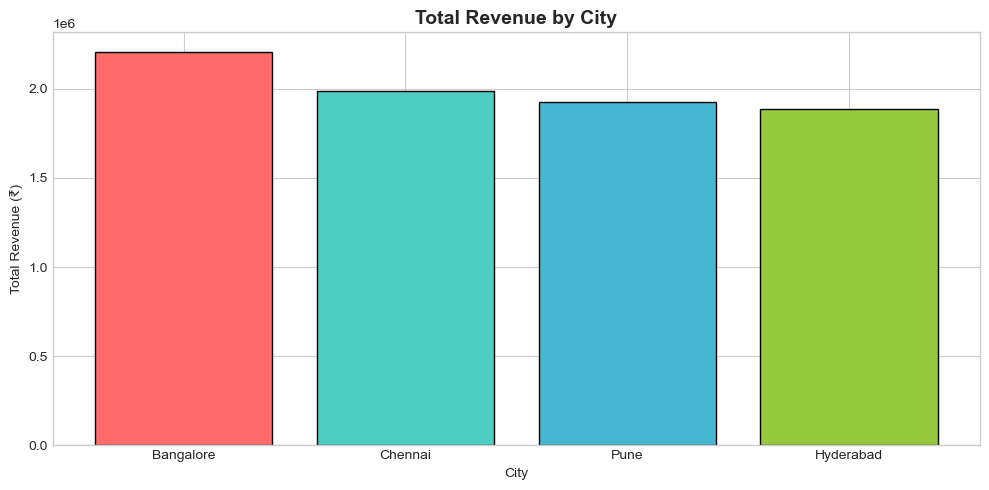

In [45]:
# Plot revenue by city
plt.figure(figsize=(10, 5))
plt.bar(city_revenue.index, city_revenue.values, color=colors, edgecolor='black')
plt.title('Total Revenue by City', fontsize=14, fontweight='bold')
plt.xlabel('City')
plt.ylabel('Total Revenue (₹)')
plt.tight_layout()
plt.show()

In [46]:
# Calculate average order value by city
city_avg = df.groupby('user_city')['total_amount'].mean()
city_avg

user_city
Bangalore    802.234308
Chennai      806.202118
Hyderabad    803.985779
Pune         792.097914
Name: total_amount, dtype: float64

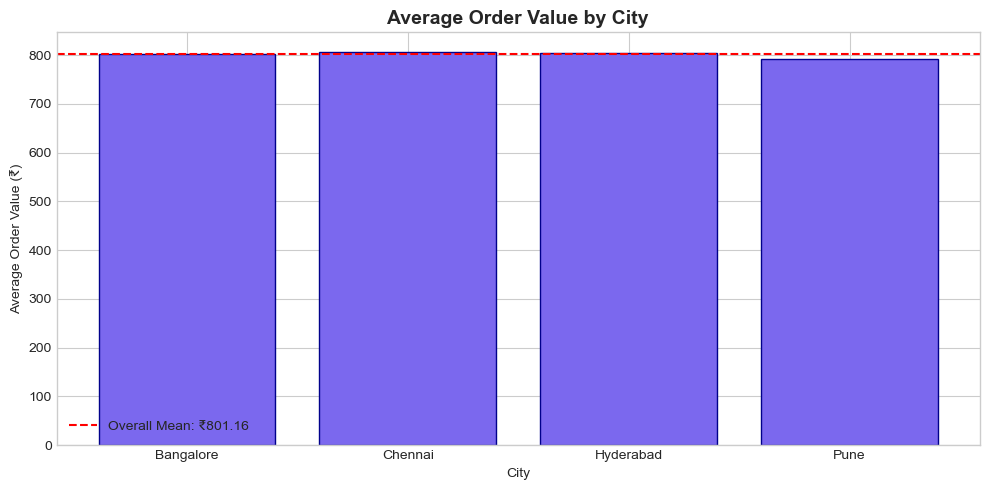

In [47]:
# Plot average order value by city
plt.figure(figsize=(10, 5))
plt.bar(city_avg.index, city_avg.values, color='mediumslateblue', edgecolor='darkblue')
plt.title('Average Order Value by City', fontsize=14, fontweight='bold')
plt.xlabel('City')
plt.ylabel('Average Order Value (₹)')
plt.axhline(df['total_amount'].mean(), color='red', linestyle='--', label=f"Overall Mean: ₹{df['total_amount'].mean():.2f}")
plt.legend()
plt.tight_layout()
plt.show()

In [48]:
# Calculate city-wise monthly orders
city_monthly = df.groupby(['user_city', 'month_name']).size().reset_index(name='orders')
city_pivot = city_monthly.pivot(index='month_name', columns='user_city', values='orders')

In [49]:
# Reorder months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
city_pivot = city_pivot.reindex(month_order)

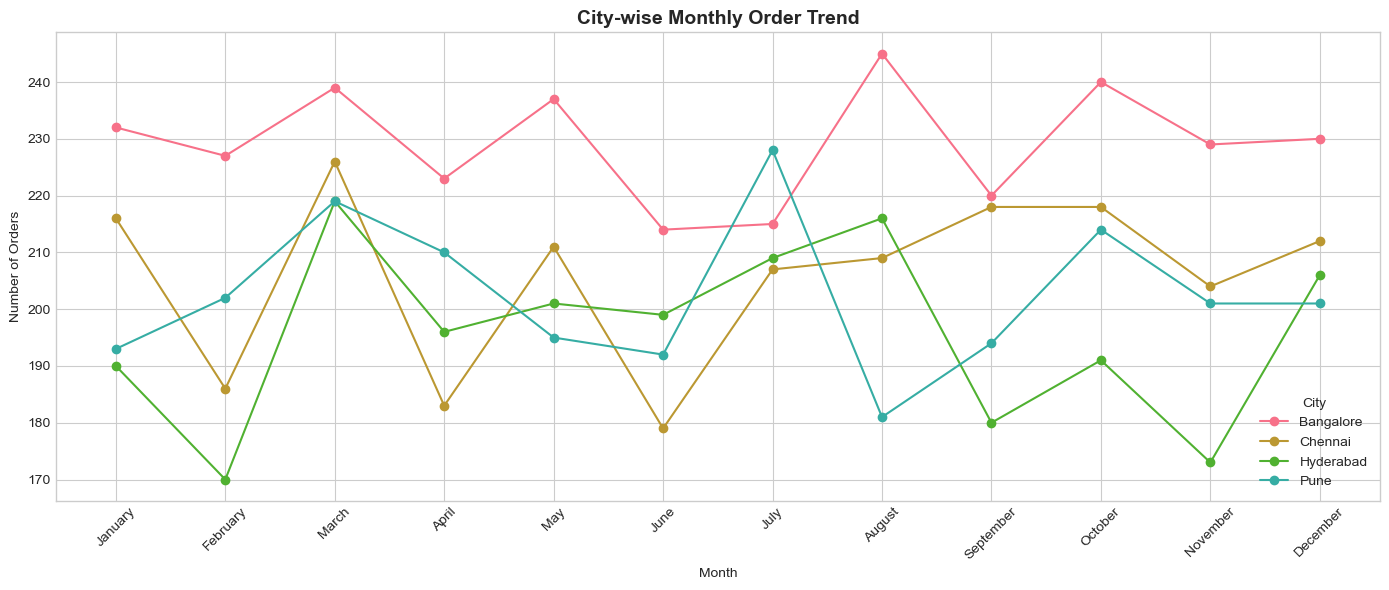

In [50]:
# Plot city-wise monthly trend
plt.figure(figsize=(14, 6))
for city in city_pivot.columns:
    plt.plot(city_pivot.index, city_pivot[city], marker='o', label=city)
plt.title('City-wise Monthly Order Trend', fontsize=14, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.legend(title='City')
plt.tight_layout()
plt.show()

---
## Section 4: Cuisine-wise Performance

In [51]:
# Count orders by cuisine
cuisine_orders = df['cuisine'].value_counts()
cuisine_orders

cuisine
Mexican    2581
Italian    2532
Indian     2469
Chinese    2418
Name: count, dtype: int64

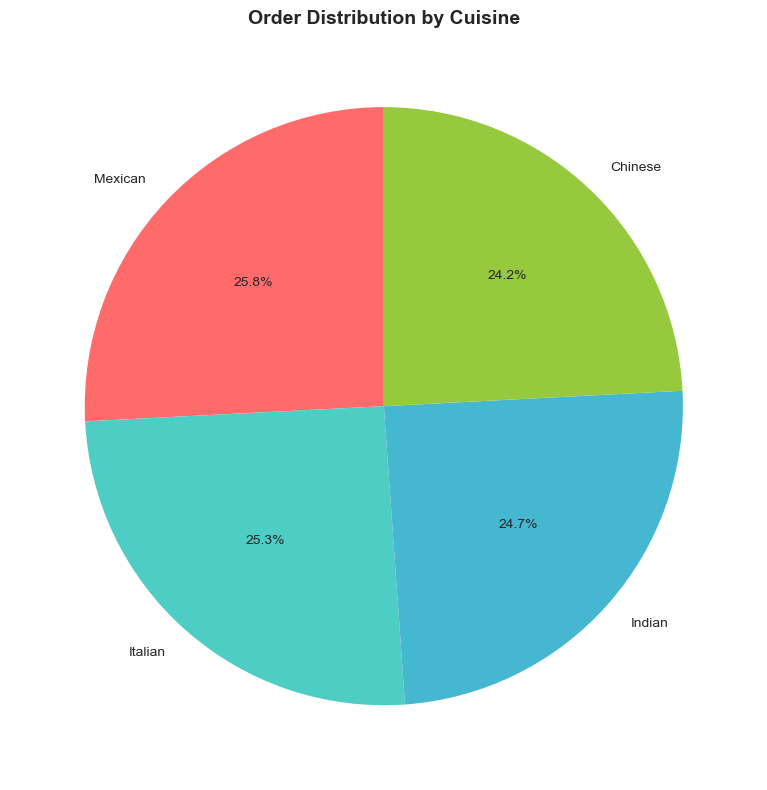

In [52]:
# Plot cuisine distribution pie chart
plt.figure(figsize=(10, 8))
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96C93D', '#F7DC6F']
plt.pie(cuisine_orders.values, labels=cuisine_orders.index, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Order Distribution by Cuisine', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [53]:
# Calculate revenue by cuisine
cuisine_revenue = df.groupby('cuisine')['total_amount'].sum().sort_values(ascending=True)
cuisine_revenue

cuisine
Chinese    1930504.65
Indian     1971412.58
Italian    2024203.80
Mexican    2085503.09
Name: total_amount, dtype: float64

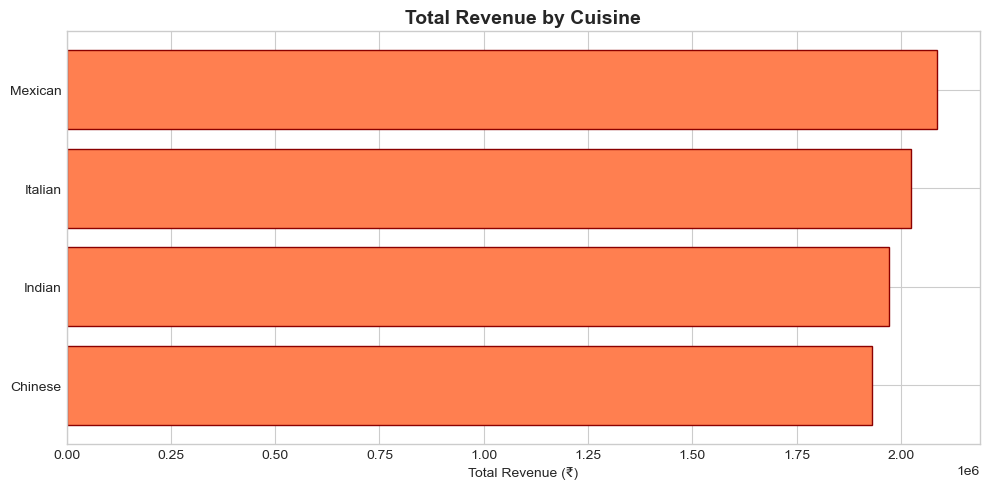

In [54]:
# Plot revenue by cuisine
plt.figure(figsize=(10, 5))
plt.barh(cuisine_revenue.index, cuisine_revenue.values, color='coral', edgecolor='darkred')
plt.title('Total Revenue by Cuisine', fontsize=14, fontweight='bold')
plt.xlabel('Total Revenue (₹)')
plt.tight_layout()
plt.show()

In [55]:
# Calculate average rating by cuisine
cuisine_rating = df.groupby('cuisine')['rating'].mean().sort_values(ascending=True)
cuisine_rating

cuisine
Mexican    4.020767
Indian     4.021466
Italian    4.042457
Chinese    4.099338
Name: rating, dtype: float64

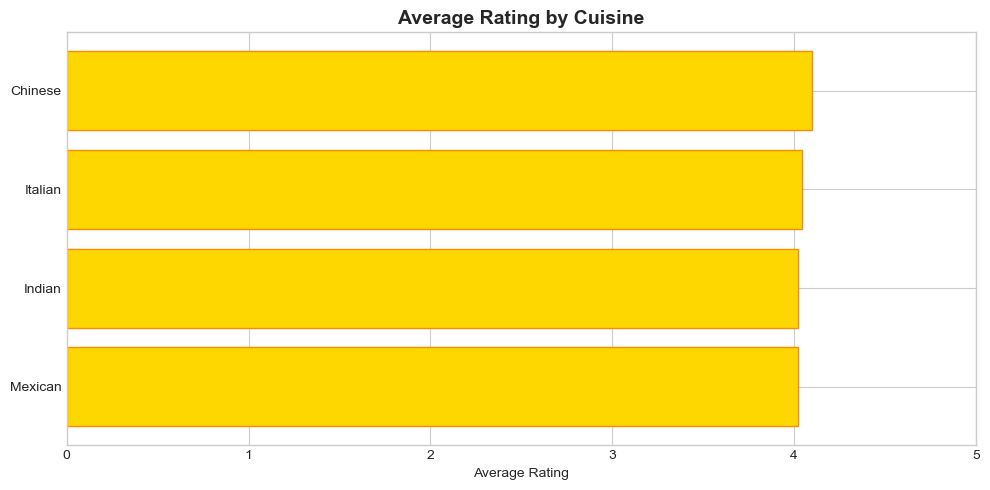

In [56]:
# Plot rating by cuisine
plt.figure(figsize=(10, 5))
plt.barh(cuisine_rating.index, cuisine_rating.values, color='gold', edgecolor='darkorange')
plt.title('Average Rating by Cuisine', fontsize=14, fontweight='bold')
plt.xlabel('Average Rating')
plt.xlim(0, 5)
plt.tight_layout()
plt.show()

In [57]:
# Calculate cuisine popularity by city
cuisine_city = df.groupby(['user_city', 'cuisine']).size().reset_index(name='orders')
cuisine_city_pivot = cuisine_city.pivot(index='user_city', columns='cuisine', values='orders')
cuisine_city_pivot

cuisine,Chinese,Indian,Italian,Mexican
user_city,,,,
Bangalore,656,697,699,699
Chennai,600,552,641,676
Hyderabad,588,577,580,605
Pune,574,643,612,601


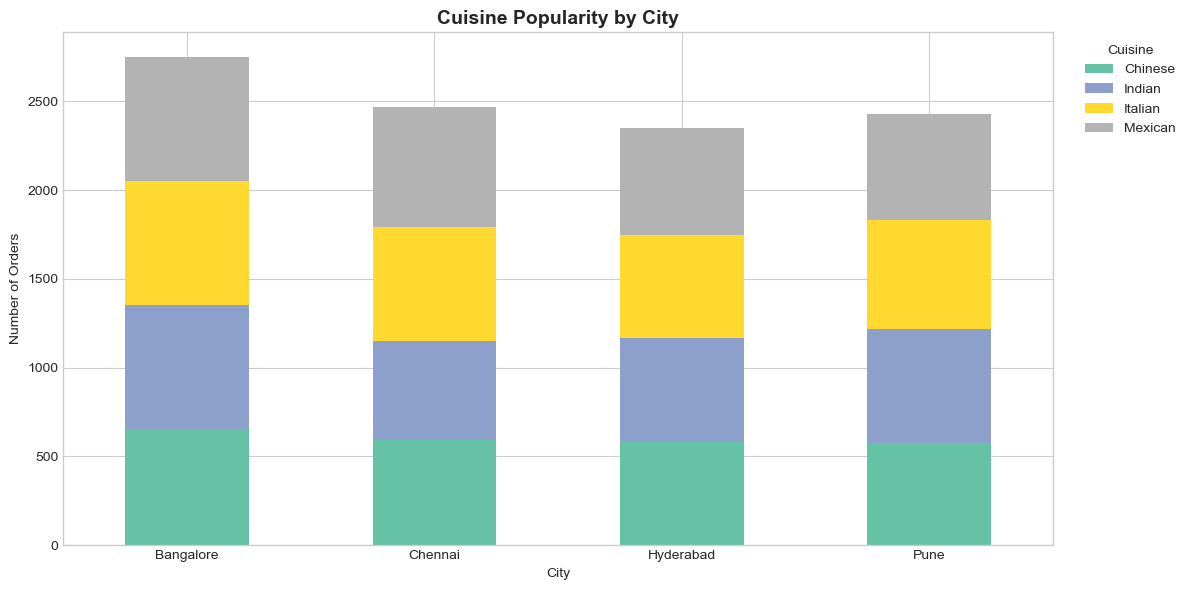

In [58]:
# Plot cuisine popularity by city
cuisine_city_pivot.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set2')
plt.title('Cuisine Popularity by City', fontsize=14, fontweight='bold')
plt.xlabel('City')
plt.ylabel('Number of Orders')
plt.legend(title='Cuisine', bbox_to_anchor=(1.02, 1))
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

---
## Section 5: Membership Impact (Gold vs Regular)

In [59]:
# Count orders by membership
membership_orders = df['membership'].value_counts()
membership_orders

membership
Regular    5013
Gold       4987
Name: count, dtype: int64

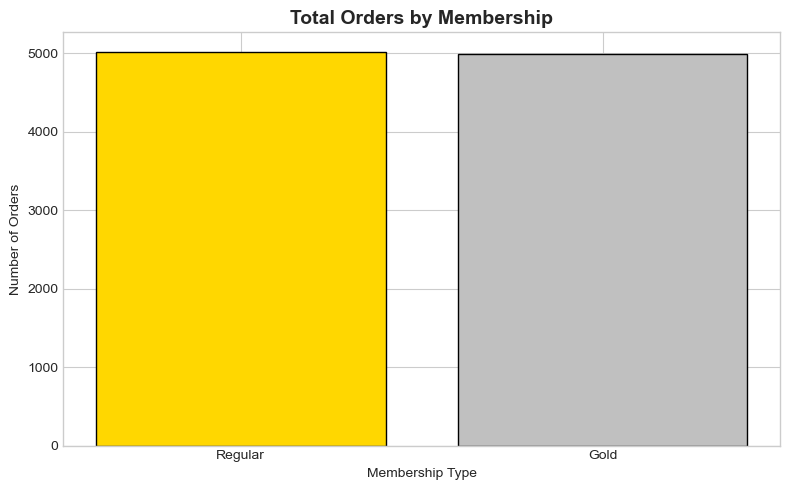

In [60]:
# Plot orders by membership
plt.figure(figsize=(8, 5))
plt.bar(membership_orders.index, membership_orders.values, color=['#FFD700', '#C0C0C0'], edgecolor='black')
plt.title('Total Orders by Membership', fontsize=14, fontweight='bold')
plt.xlabel('Membership Type')
plt.ylabel('Number of Orders')
plt.tight_layout()
plt.show()

In [61]:
# Calculate revenue by membership
membership_revenue = df.groupby('membership')['total_amount'].sum()
membership_revenue

membership
Gold       3975364.89
Regular    4036259.23
Name: total_amount, dtype: float64

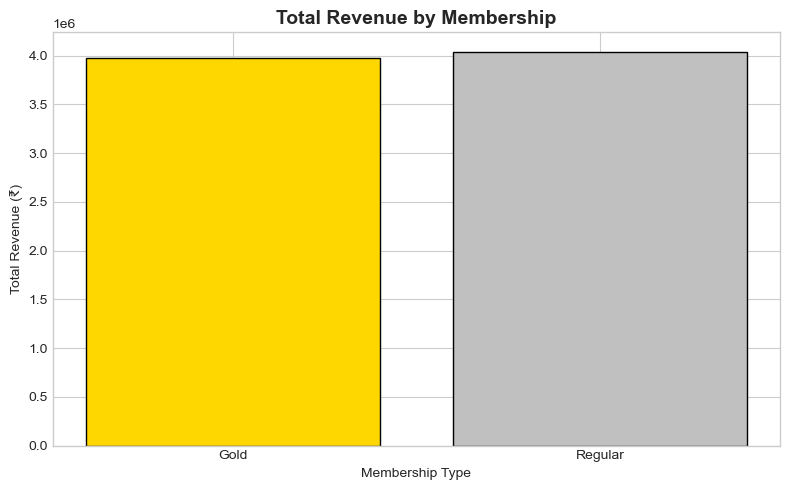

In [62]:
# Plot revenue by membership
plt.figure(figsize=(8, 5))
plt.bar(membership_revenue.index, membership_revenue.values, color=['#FFD700', '#C0C0C0'], edgecolor='black')
plt.title('Total Revenue by Membership', fontsize=14, fontweight='bold')
plt.xlabel('Membership Type')
plt.ylabel('Total Revenue (₹)')
plt.tight_layout()
plt.show()

In [63]:
# Calculate average order value by membership
membership_avg = df.groupby('membership')['total_amount'].mean()
membership_avg

membership
Gold       797.145556
Regular    805.158434
Name: total_amount, dtype: float64

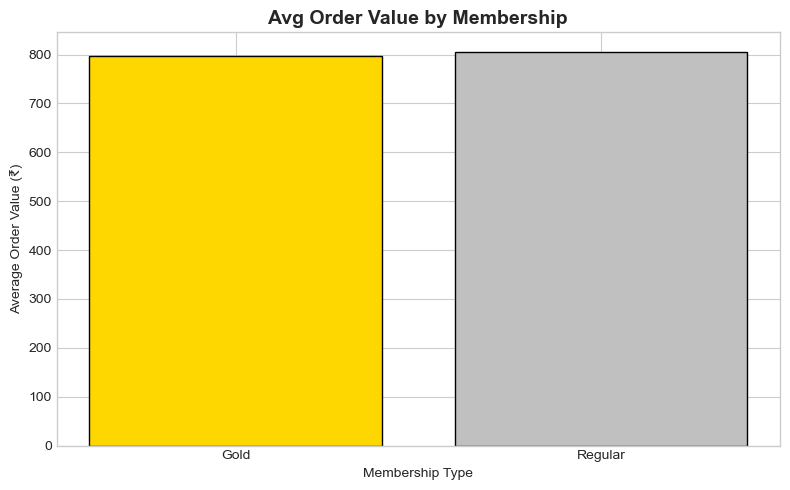

In [64]:
# Plot average order value by membership
plt.figure(figsize=(8, 5))
plt.bar(membership_avg.index, membership_avg.values, color=['#FFD700', '#C0C0C0'], edgecolor='black')
plt.title('Avg Order Value by Membership', fontsize=14, fontweight='bold')
plt.xlabel('Membership Type')
plt.ylabel('Average Order Value (₹)')
plt.tight_layout()
plt.show()

In [65]:
# Count unique users by membership
membership_users = df.groupby('membership')['user_id'].nunique()
membership_users

membership
Gold       1430
Regular    1453
Name: user_id, dtype: int64

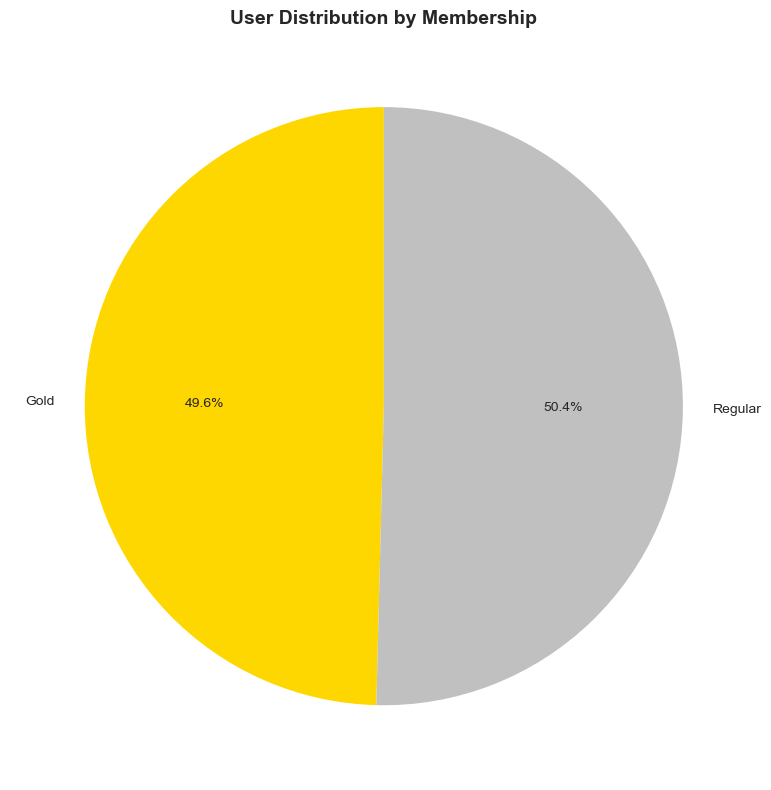

In [66]:
# Plot user distribution by membership
plt.figure(figsize=(8, 8))
plt.pie(membership_users.values, labels=membership_users.index, autopct='%1.1f%%', colors=['#FFD700', '#C0C0C0'], startangle=90)
plt.title('User Distribution by Membership', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [67]:
# Calculate membership by city
membership_city = df.groupby(['user_city', 'membership']).size().reset_index(name='orders')
membership_city_pivot = membership_city.pivot(index='user_city', columns='membership', values='orders')
membership_city_pivot

membership,Gold,Regular
user_city,,
Bangalore,1254,1497
Chennai,1337,1132
Hyderabad,1112,1238
Pune,1284,1146


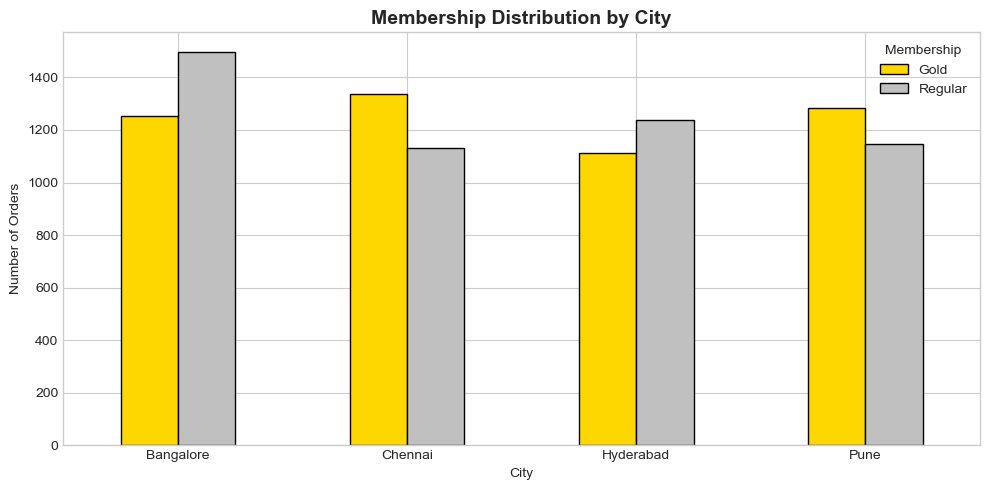

In [68]:
# Plot membership distribution by city
membership_city_pivot.plot(kind='bar', figsize=(10, 5), color=['#FFD700', '#C0C0C0'], edgecolor='black')
plt.title('Membership Distribution by City', fontsize=14, fontweight='bold')
plt.xlabel('City')
plt.ylabel('Number of Orders')
plt.legend(title='Membership')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

---
## Section 6: Revenue Distribution and Seasonality

In [69]:
# Check order amount statistics
df['total_amount'].describe()

count    10000.000000
mean       801.162412
std        405.458753
min        100.200000
25%        446.310000
50%        806.295000
75%       1149.227500
max       1499.830000
Name: total_amount, dtype: float64

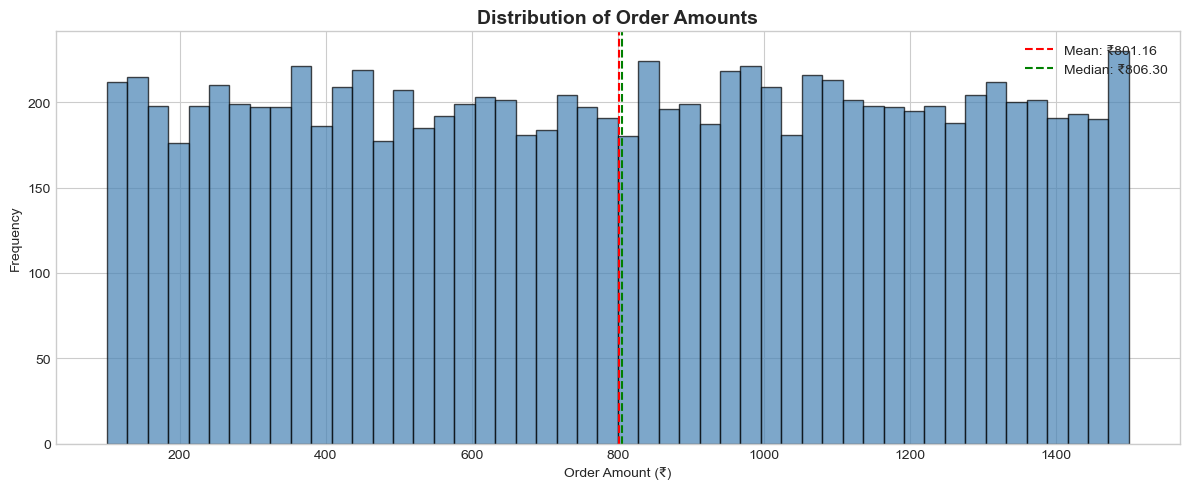

In [70]:
# Plot order amount distribution
plt.figure(figsize=(12, 5))
plt.hist(df['total_amount'], bins=50, color='steelblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Order Amounts', fontsize=14, fontweight='bold')
plt.xlabel('Order Amount (₹)')
plt.ylabel('Frequency')
plt.axvline(df['total_amount'].mean(), color='red', linestyle='--', label=f"Mean: ₹{df['total_amount'].mean():.2f}")
plt.axvline(df['total_amount'].median(), color='green', linestyle='--', label=f"Median: ₹{df['total_amount'].median():.2f}")
plt.legend()
plt.tight_layout()
plt.show()

In [71]:
# Calculate monthly revenue with moving average
monthly_rev = df.groupby(df['order_date'].dt.to_period('M'))['total_amount'].sum().reset_index()
monthly_rev['order_date'] = monthly_rev['order_date'].astype(str)
monthly_rev['moving_avg'] = monthly_rev['total_amount'].rolling(window=3).mean()
monthly_rev

,order_date,total_amount,moving_avg
0,2023-01,645818.76,NaN
1,2023-02,630867.40,NaN
2,2023-03,716738.98,664475.046667
3,2023-04,666097.18,671234.520000
4,2023-05,668428.61,683754.923333
5,2023-06,610822.93,648449.573333
6,2023-07,688559.45,655936.996667
7,2023-08,694987.58,664789.986667
8,2023-09,653838.07,679128.366667
9,2023-10,699187.73,682671.126667


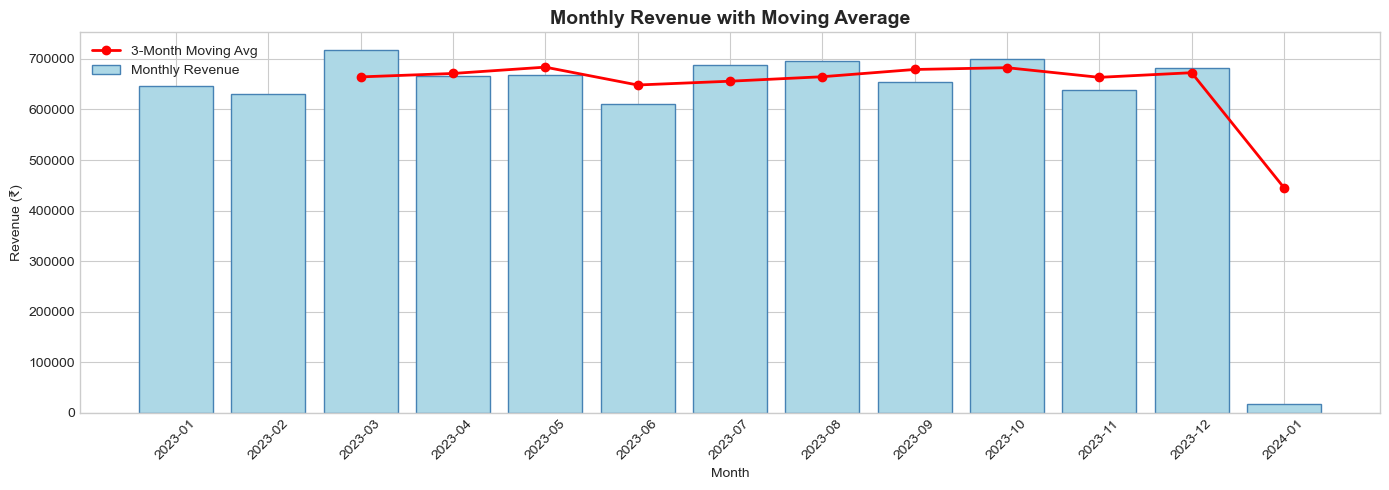

In [72]:
# Plot monthly revenue with moving average
plt.figure(figsize=(14, 5))
plt.bar(monthly_rev['order_date'], monthly_rev['total_amount'], color='lightblue', edgecolor='steelblue', label='Monthly Revenue')
plt.plot(monthly_rev['order_date'], monthly_rev['moving_avg'], color='red', linewidth=2, marker='o', label='3-Month Moving Avg')
plt.title('Monthly Revenue with Moving Average', fontsize=14, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Revenue (₹)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [73]:
# Calculate quarterly revenue statistics
quarter_revenue = df.groupby('quarter')['total_amount'].agg(['sum', 'mean', 'count']).reset_index()
quarter_revenue.columns = ['Quarter', 'Total Revenue', 'Avg Order Value', 'Order Count']
quarter_revenue

,Quarter,Total Revenue,Avg Order Value,Order Count
0,1,2010626.64,798.184454,2519
1,2,1945348.72,797.274066,2440
2,3,2037385.10,807.845004,2522
3,4,2018263.66,801.216221,2519


In [74]:
# Calculate revenue by day of week
day_revenue = df.groupby('day_of_week')['total_amount'].sum()
day_revenue = day_revenue.reindex(day_order)
day_revenue

day_of_week
Monday       1137568.63
Tuesday      1082081.63
Wednesday    1126468.28
Thursday     1145695.14
Friday       1174418.88
Saturday     1156335.84
Sunday       1189055.72
Name: total_amount, dtype: float64

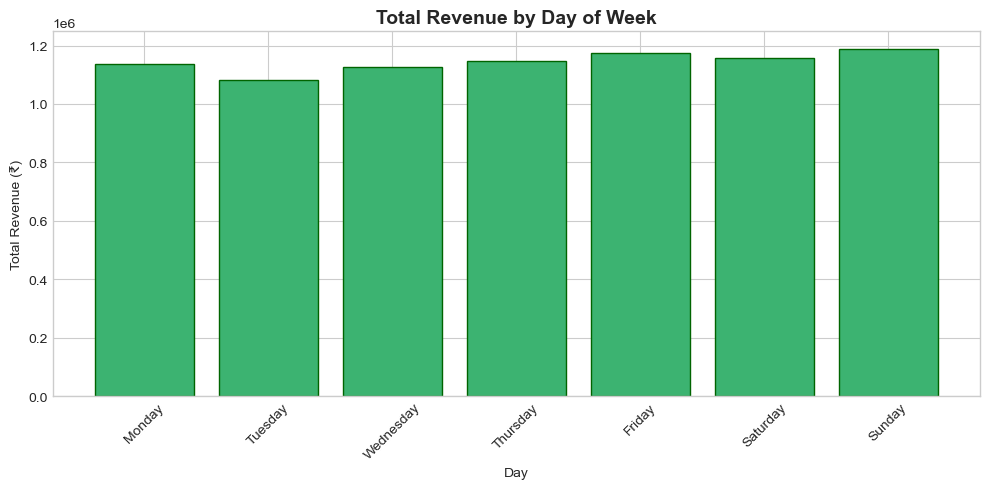

In [75]:
# Plot revenue by day of week
plt.figure(figsize=(10, 5))
plt.bar(day_revenue.index, day_revenue.values, color='mediumseagreen', edgecolor='darkgreen')
plt.title('Total Revenue by Day of Week', fontsize=14, fontweight='bold')
plt.xlabel('Day')
plt.ylabel('Total Revenue (₹)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [76]:
# Calculate average order value by day of week
day_avg = df.groupby('day_of_week')['total_amount'].mean()
day_avg = day_avg.reindex(day_order)
day_avg

day_of_week
Monday       802.234577
Tuesday      790.995344
Wednesday    802.327835
Thursday     788.503193
Friday       801.104284
Saturday     808.626462
Sunday       813.864285
Name: total_amount, dtype: float64

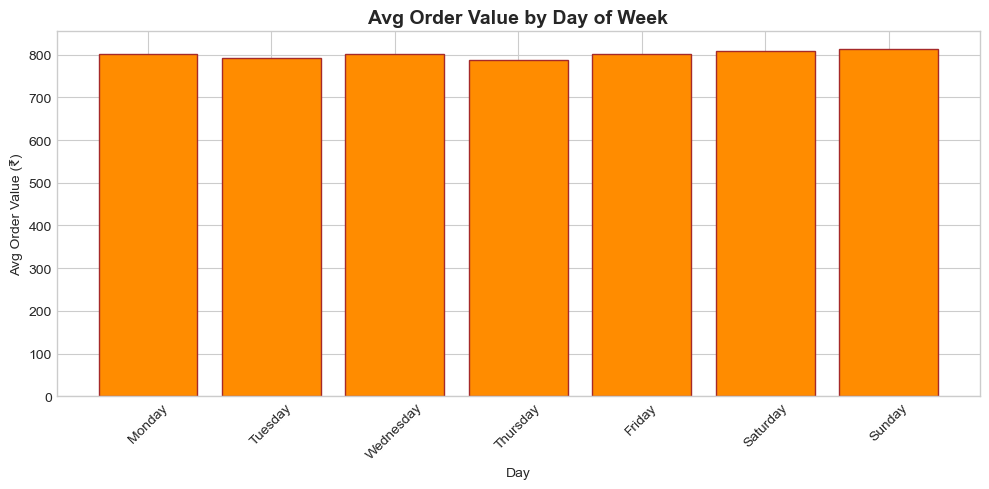

In [77]:
# Plot average order value by day of week
plt.figure(figsize=(10, 5))
plt.bar(day_avg.index, day_avg.values, color='darkorange', edgecolor='brown')
plt.title('Avg Order Value by Day of Week', fontsize=14, fontweight='bold')
plt.xlabel('Day')
plt.ylabel('Avg Order Value (₹)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [78]:
# Create heatmap data
heatmap_data = df.groupby(['month_name', 'day_of_week']).size().reset_index(name='orders')
heatmap_pivot = heatmap_data.pivot(index='day_of_week', columns='month_name', values='orders')
heatmap_pivot = heatmap_pivot.reindex(day_order)
heatmap_pivot = heatmap_pivot[month_order]

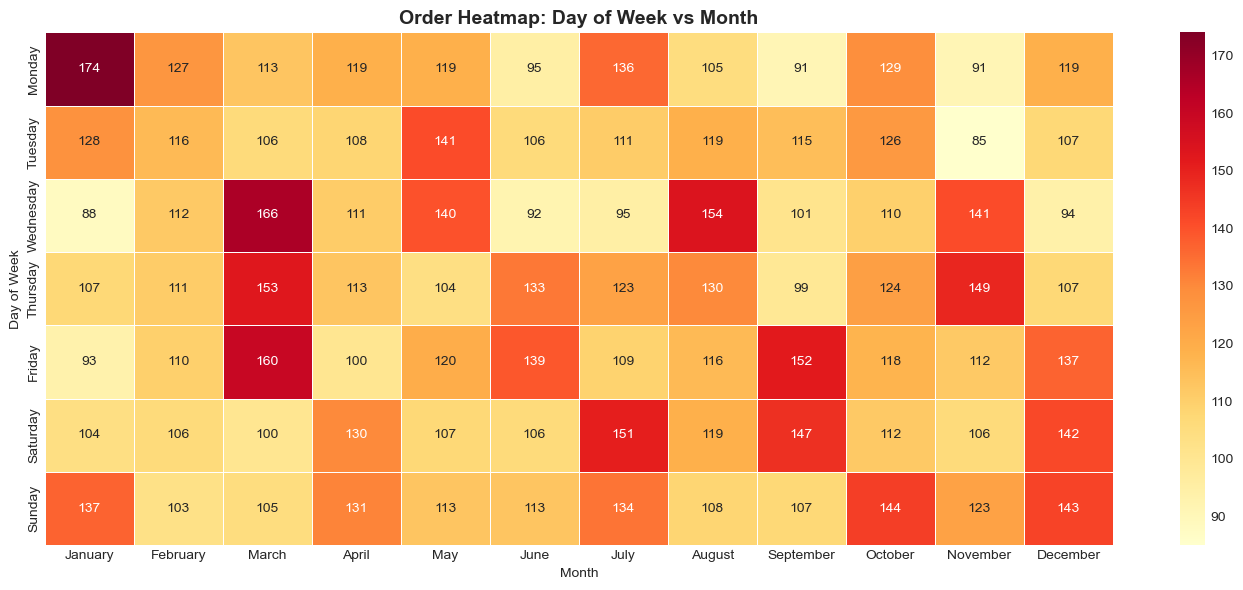

In [79]:
# Plot heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(heatmap_pivot, annot=True, fmt='d', cmap='YlOrRd', linewidths=0.5)
plt.title('Order Heatmap: Day of Week vs Month', fontsize=14, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Day of Week')
plt.tight_layout()
plt.show()

---
## Section 7: Additional Analysis

In [80]:
# Check rating statistics
df['rating'].describe()

count    10000.000000
mean         4.045430
std          0.606531
min          3.000000
25%          3.500000
50%          4.100000
75%          4.600000
max          5.000000
Name: rating, dtype: float64

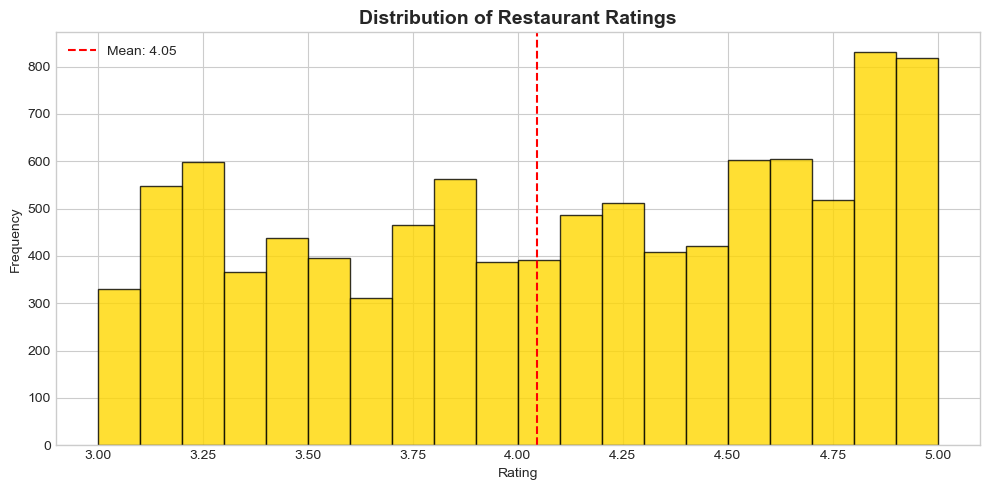

In [81]:
# Plot rating distribution
plt.figure(figsize=(10, 5))
plt.hist(df['rating'], bins=20, color='gold', edgecolor='black', alpha=0.8)
plt.title('Distribution of Restaurant Ratings', fontsize=14, fontweight='bold')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.axvline(df['rating'].mean(), color='red', linestyle='--', label=f"Mean: {df['rating'].mean():.2f}")
plt.legend()
plt.tight_layout()
plt.show()

In [82]:
# Find top 10 restaurants by orders
top_restaurants = df.groupby('restaurant_name').size().nlargest(10).reset_index(name='orders')
top_restaurants

,restaurant_name,orders
0,Spice Foods Non-Veg,67
1,Darbar Eatery Family Restaurant,63
2,Amma Biryani North Indian,57
3,Sai Restaurant Non-Veg,57
4,Swagath Cafe Multicuisine,55
5,Hotel Curry House North Indian,53
6,Annapurna Kitchen North Indian,52
7,Amma Cafe South Indian,50
8,Swagath Delights Andhra,49
9,Hotel Curry House Chinese,47


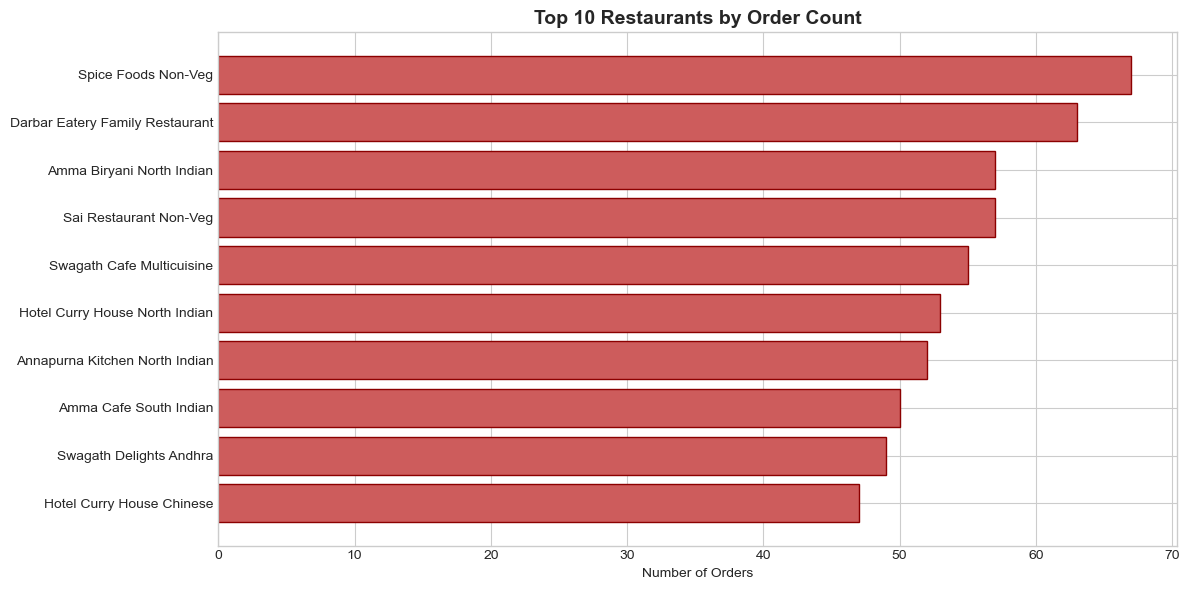

In [83]:
# Plot top restaurants
plt.figure(figsize=(12, 6))
plt.barh(top_restaurants['restaurant_name'], top_restaurants['orders'], color='indianred', edgecolor='darkred')
plt.title('Top 10 Restaurants by Order Count', fontsize=14, fontweight='bold')
plt.xlabel('Number of Orders')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [84]:
# Calculate correlation between rating and total_amount
correlation = df[['total_amount', 'rating']].corr()
correlation

,total_amount,rating
total_amount,1.000000,-0.008244
rating,-0.008244,1.000000


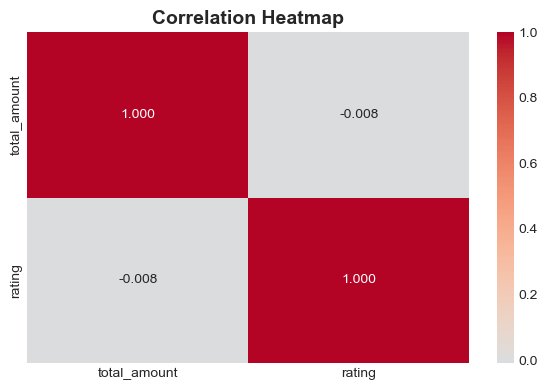

In [85]:
# Plot correlation heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0, fmt='.3f')
plt.title('Correlation Heatmap', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

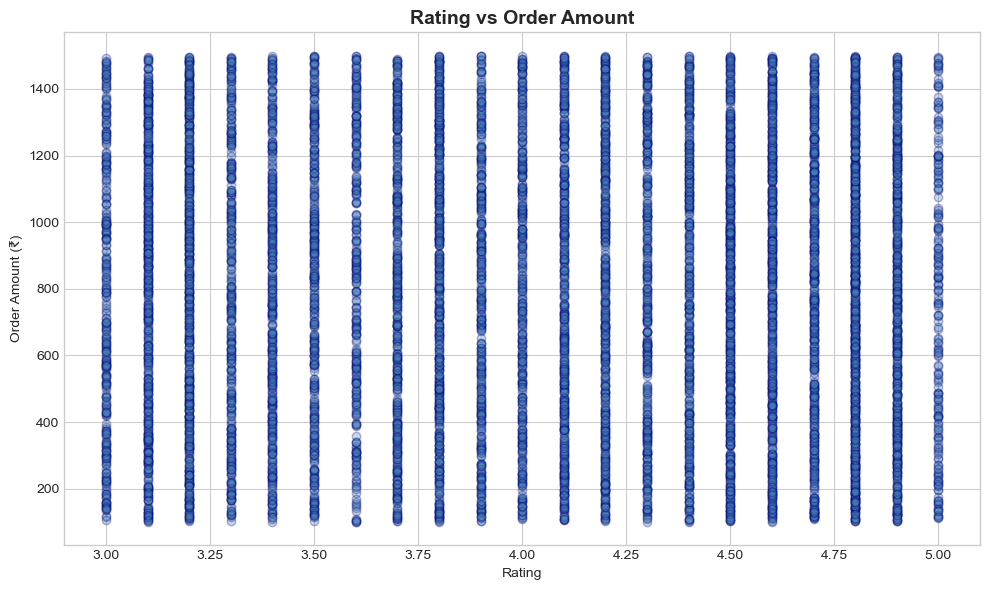

In [86]:
# Plot rating vs order amount
plt.figure(figsize=(10, 6))
plt.scatter(df['rating'], df['total_amount'], alpha=0.3, c='steelblue', edgecolor='navy')
plt.title('Rating vs Order Amount', fontsize=14, fontweight='bold')
plt.xlabel('Rating')
plt.ylabel('Order Amount (₹)')
plt.tight_layout()
plt.show()

---
## Summary Statistics

In [87]:
# Print total orders
print(f"Total Orders: {len(df):,}")

Total Orders: 10,000


In [88]:
# Print total revenue
print(f"Total Revenue: ₹{df['total_amount'].sum():,.2f}")

Total Revenue: ₹8,011,624.12


In [89]:
# Print average order value
print(f"Average Order Value: ₹{df['total_amount'].mean():.2f}")

Average Order Value: ₹801.16


In [90]:
# Print unique users and restaurants
print(f"Unique Users: {df['user_id'].nunique():,}")
print(f"Unique Restaurants: {df['restaurant_id'].nunique():,}")

Unique Users: 2,883
Unique Restaurants: 500


In [91]:
# Print most popular city
print(f"Most Popular City: {df['user_city'].value_counts().index[0]}")

Most Popular City: Bangalore


In [92]:
# Print most popular cuisine
print(f"Most Popular Cuisine: {df['cuisine'].value_counts().index[0]}")

Most Popular Cuisine: Mexican


In [93]:
# Print average rating
print(f"Average Rating: {df['rating'].mean():.2f}")

Average Rating: 4.05


In [94]:
# Print membership statistics
print(f"Gold Members Orders: {len(df[df['membership']=='Gold']):,}")
print(f"Regular Members Orders: {len(df[df['membership']=='Regular']):,}")

Gold Members Orders: 4,987
Regular Members Orders: 5,013


In [95]:
# Final summary
print("="*50)
print("ANALYSIS COMPLETE!")
print("="*50)

ANALYSIS COMPLETE!
